In [ ]:
# libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
#Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm
# Importing r2_square
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Loading Data

In [ ]:
# Read the given CSV file, and view some sample records
train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/pisa2009train.csv")
test = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/pisa2009test.csv")
#print(train.head(5))


# Understanding Data


In [ ]:
# Shape of our dataset
print("----------------------")
print("Shape of dataset")
print("Train data: ", train.shape)
print("Test data: ",test.shape)
print("----------------------")
print("--------------------------------------------------------------------")

# Info our dataset
print("Info on dataset")
train.info()
print("--------------------------------------------------------------------")
print("--------------------------------------------------------------------")


# Describe our dataset
print("Description of dataset")
print(train.describe())
print("--------------------------------------------------------------------------")
print("--------------------------------------------------------------------------")

# Number of unique values in each column
print("Number of Unique values in each column")
for names in train.columns:
  print(names,":",train[names].unique())
print("--------------------------------------------------------------------------")
print("--------------------------------------------------------------------------")


----------------------
Shape of dataset
Train data:  (3663, 24)
Test data:  (1570, 24)
----------------------
--------------------------------------------------------------------
Info on dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS       

From the summary statistics we see that there are many missing value values in many variable columns.

1.   From the information on data,we see that, there are 20 categorical variables and 4 continuous variables including target variable
2.  Out of 20 categorical variables, we have 4 variables of type int64,1 of type object and 15 of type float64.

We have to convert categorical variable of type float to integer.

Let's check for null values

##### Checking for missing values

In [ ]:
print(train.isnull().sum())


grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64


#### Checking for count of unique values in each column

In [ ]:
lst1 =['grade', 'raceeth', 'preschool','expectBachelors', 'motherHS', 'motherBachelors', 'motherWork',
      'fatherHS', 'fatherBachelors', 'fatherWork','selfBornUS', 'motherBornUS','fatherBornUS', 
      'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',  'schoolHasLibrary' ]
for name in lst1:
  train[name].value_counts()
  print(train[name].value_counts())

10    2532
11     726
9      397
12       4
8        4
Name: grade, dtype: int64
White                                     2015
Hispanic                                   834
Black                                      444
Asian                                      143
More than one race                         124
American Indian/Alaska Native               37
Native Hawaiian/Other Pacific Islander      31
Name: raceeth, dtype: int64
1.0    2607
0.0    1000
Name: preschool, dtype: int64
1.0    2830
0.0     771
Name: expectBachelors, dtype: int64
1.0    3138
0.0     428
Name: motherHS, dtype: int64
0.0    2129
1.0    1137
Name: motherBachelors, dtype: int64
1.0    2622
0.0     948
Name: motherWork, dtype: int64
1.0    2937
0.0     481
Name: fatherHS, dtype: int64
0.0    2067
1.0    1027
Name: fatherBachelors, dtype: int64
1.0    2926
0.0     504
Name: fatherWork, dtype: int64
1.0    3347
0.0     247
Name: selfBornUS, dtype: int64
1.0    2775
0.0     817
Name: motherBornUS, dtype: int64


# Cleaning


#### Replacing missing values with median

In [ ]:
lst2 =['preschool','expectBachelors', 'motherHS', 'motherBachelors', 'motherWork',
      'fatherHS', 'fatherBachelors', 'fatherWork','selfBornUS', 'motherBornUS','fatherBornUS', 
      'englishAtHome', 'computerForSchoolwork', 'read30MinsADay',  'schoolHasLibrary' ]
   
for name in lst2:
  #train[name] = train[name].fillna( train[name].mode())
  train[name] = train[name].fillna( train[name].median())
 
train.isnull().sum()

grade                      0
male                       0
raceeth                   35
preschool                  0
expectBachelors            0
motherHS                   0
motherBachelors            0
motherWork                 0
fatherHS                   0
fatherBachelors            0
fatherWork                 0
selfBornUS                 0
motherBornUS               0
fatherBornUS               0
englishAtHome              0
computerForSchoolwork      0
read30MinsADay             0
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary           0
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

#### Dropping missing values in the continuous varibles

In [ ]:
train.dropna(inplace=True)
test.dropna(inplace=True)

#### Converting categorical values of type float into integer

In [ ]:
train[lst2] = train[lst2].astype('int64')
test[lst2]=test[lst2].astype('int64')

# Visualization

## Distribution of continuous variables

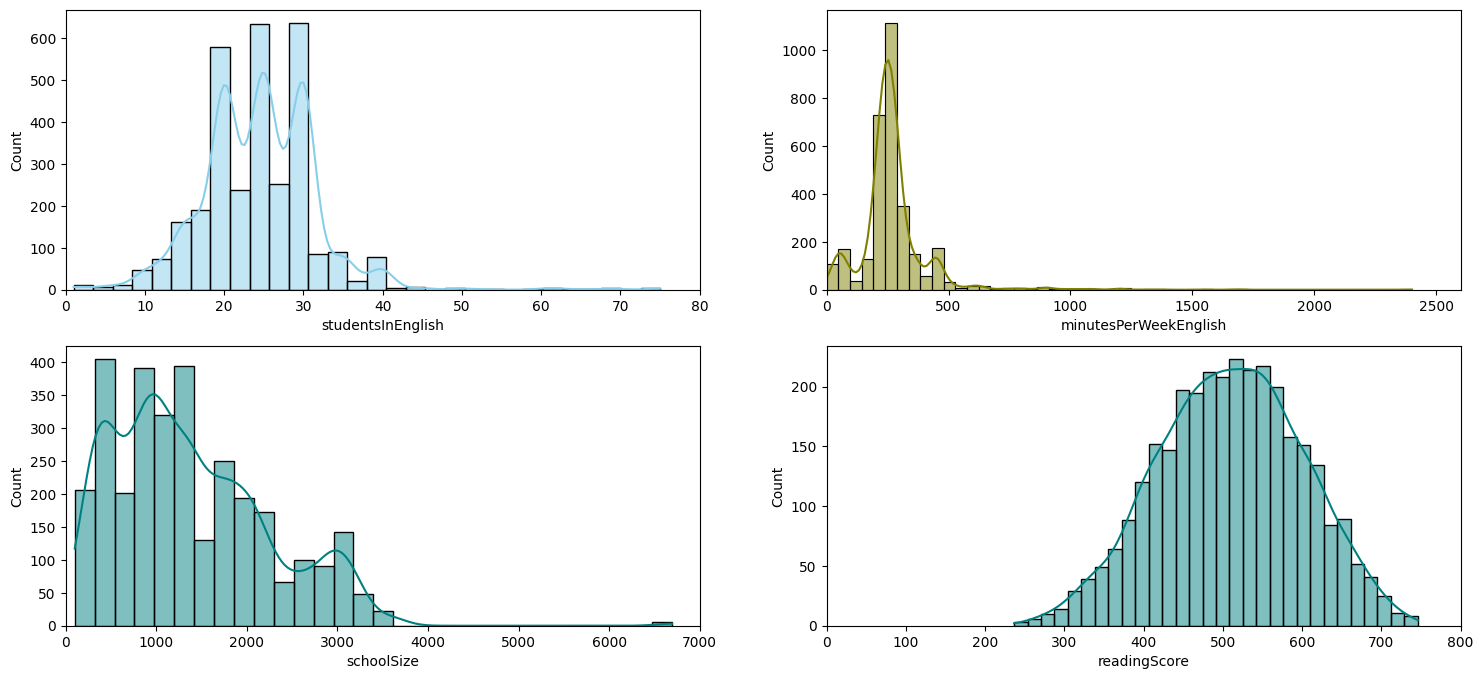

Maximum Value :
 minutesPerWeekEnglish    2400.0
schoolSize               6694.0
readingScore              746.0
studentsInEnglish          75.0
dtype: float64
Minimum value :
 minutesPerWeekEnglish      0.00
schoolSize               100.00
readingScore             236.62
studentsInEnglish          1.00
dtype: float64


In [ ]:
# 'minutesPerWeekEnglish','schoolSize ', 'readingScore', 'studentsInEnglish'

fig, axs = plt.subplots(2, 2, figsize=(18, 8))

sns.histplot(data=train, x="studentsInEnglish", kde=True, bins=30, color="skyblue",  ax=axs[0, 0]).set(xlim=(0,80))
sns.histplot(data=train, x="minutesPerWeekEnglish", kde=True, bins=50, color="olive", ax=axs[0, 1]).set(xlim=(0,2600))
sns.histplot(data=train, x="schoolSize", kde=True, bins=30,color="teal", ax=axs[1,0]).set(xlim=(0,7000))
sns.histplot(data=train, x="readingScore", kde=True, bins=30,color="teal", ax=axs[1, 1]).set(xlim=(0,800))


plt.show()

print("Maximum Value :\n", train[['minutesPerWeekEnglish','schoolSize', 'readingScore', 'studentsInEnglish']]. max())
print("Minimum value :\n",train[['minutesPerWeekEnglish','schoolSize', 'readingScore', 'studentsInEnglish']]. min())




Exploring Categorical variables

   grade  readingScore
4     12        610.12
3     11        533.97
2     10        511.89
1      9        433.30
0      8        375.61
                                  raceeth  readingScore
0           American Indian/Alaska Native        436.71
2                                   Black        454.98
3                                Hispanic        475.89
4                      More than one race        511.93
5  Native Hawaiian/Other Pacific Islander        515.34
6                                   White        530.53
1                                   Asian        547.72


Text(0.5, 1.0, 'Race/Ehinicity')

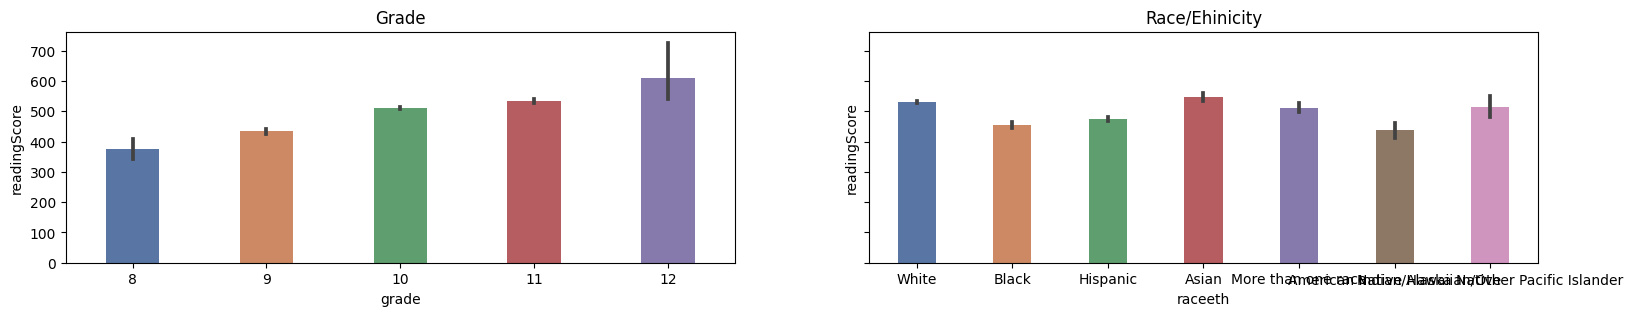

In [ ]:
# Grade 
print(train[["grade", "readingScore"]].groupby(['grade'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))

#race

print(train[["raceeth", "readingScore"]].groupby(['raceeth'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=True))


fig, axes = plt.subplots(1, 2, figsize=(19,3), sharey=True)
#fig.suptitle('Reading Scores')

# grade
sns.barplot(ax=axes[0], x="grade", y="readingScore", data=train, palette="deep", width=0.4)
axes[0].set_title('Grade')

# raceeth
sns.barplot(ax=axes[1], x="raceeth", y="readingScore", data=train,palette="deep", width=0.4)
axes[1].set_title('Race/Ehinicity')


Student being male or whether he attended preschool or do not have any influence on reading score.

   motherHS  readingScore
1         1        513.55
0         0        475.30


   fatherHS  readingScore
1         1        514.48
0         0        472.85

)
   expectBachelors  readingScore
1                1        523.76
0                0        446.27


   motherBachelors  readingScore
1                1        540.49
0                0        494.24


   fatherBachelors  readingScore
1                1        546.04
0                0        493.48

)


<Axes: xlabel='fatherBachelors', ylabel='readingScore'>

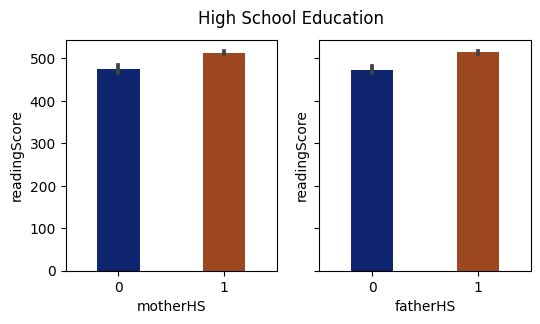

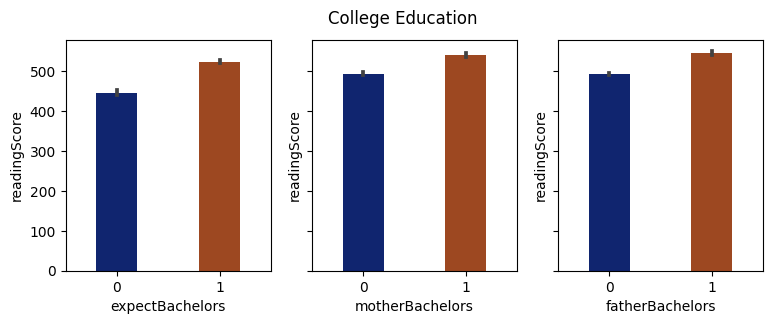

In [ ]:
#print("motherHS and Reading Score")
print(train[["motherHS", "readingScore"]].groupby(['motherHS'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print("\n")
#print("fatherHS and Reading Score")
print(train[["fatherHS", "readingScore"]].groupby(['fatherHS'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print('\n)')

#print("expectBachelors and Reading Score")
print(train[["expectBachelors", "readingScore"]].groupby(['expectBachelors'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print("\n")
#print("motherBachelors and Reading Score")
print(train[["motherBachelors", "readingScore"]].groupby(['motherBachelors'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print("\n")
#print("fatherBachelors and Reading Score")
print(train[["fatherBachelors", "readingScore"]].groupby(['fatherBachelors'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print('\n)')


fig, axes = plt.subplots(1, 2, figsize=(6,3), sharey=True)
fig.suptitle('High School Education')
# motherHS
sns.barplot(ax=axes[0], x="motherHS", y="readingScore", data=train,palette="dark", width=0.4)

# fatherHS
sns.barplot(ax=axes[1], x="fatherHS", y="readingScore", data=train, palette="dark", width=0.4)

fig, axes = plt.subplots(1, 3, figsize=(9,3), sharey=True)
fig.suptitle('College Education')
# expectBachelors
sns.barplot(ax=axes[0], x="expectBachelors", y="readingScore", data=train, palette="dark", width=0.4)
#axes[0].set_title('expectBachelors vs Reading Score')

# motherBachelors
sns.barplot(ax=axes[1], x="motherBachelors", y="readingScore", data=train, palette="dark", width=0.4)
#axes[1].set_title('motherBachelors vs Reading Score')

# fatherBachelors
sns.barplot(ax=axes[2], x="fatherBachelors", y="readingScore", data=train, palette="dark", width=0.4)
#axes[2].set_title('fatherBachelors vs Reading Score')


               readingScore
englishAtHome              
1                    513.01
0                    483.09


                       readingScore
computerForSchoolwork              
1                            514.06
0                            461.62


                readingScore
read30MinsADay              
1                     544.37
0                     494.81

)
   urban  readingScore
0      0        512.30
1      1        504.53

)


Text(0.5, 1.0, 'Public School')

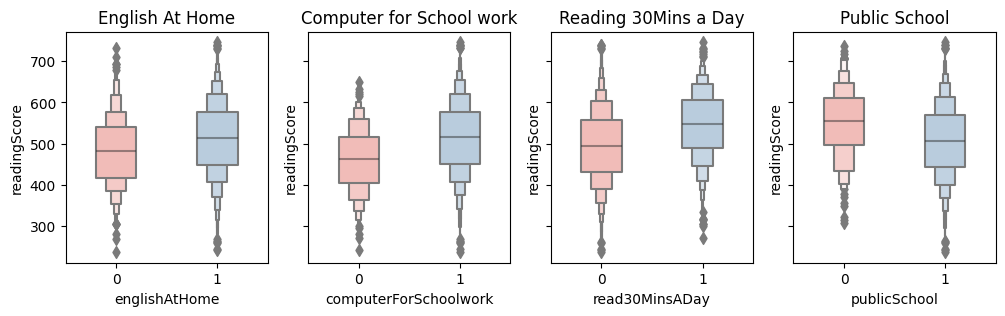

In [ ]:
#print("englishAtHome and Reading Score")
print(train[["englishAtHome", "readingScore"]].groupby(['englishAtHome'], as_index=True).mean().round(2).sort_values(by='readingScore', ascending=False))
print("\n")
#print("computerForSchoolwork and Reading Score")
print(train[["computerForSchoolwork", "readingScore"]].groupby(['computerForSchoolwork'], as_index=True).mean().round(2).sort_values(by='readingScore', ascending=False))
print("\n")
#print("read30MinsADay and Reading Score")
print(train[["read30MinsADay", "readingScore"]].groupby(['read30MinsADay'], as_index=True).mean().round(2).sort_values(by='readingScore', ascending=False))
print('\n)')

#print("urban and Reading Score")
print(train[["urban", "readingScore"]].groupby(['urban'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print('\n)')


fig, axes = plt.subplots(1, 4, figsize=(12,3), sharey=True)
fig.suptitle('')

# englishAtHome
sns.boxenplot(ax=axes[0], x="englishAtHome", y="readingScore", data=train,palette = "Pastel1", width=0.4)
axes[0].set_title('English At Home')

# computerForSchoolwork
sns.boxenplot(ax=axes[1], x="computerForSchoolwork", y="readingScore", data=train, palette = "Pastel1", width=0.4)
axes[1].set_title('Computer for School work')

# read30MinsADay
sns.boxenplot(ax=axes[2], x="read30MinsADay", y="readingScore", data=train, palette = "Pastel1", width=0.4)
axes[2].set_title('Reading 30Mins a Day')

# publicSchool
sns.boxenplot(ax=axes[3], x="publicSchool", y="readingScore", palette = "Pastel1", data=train, width=0.4)
axes[3].set_title('Public School')


      readingScore
male              
0           523.25
1           495.77


           readingScore
preschool              
1                511.20
0                504.54

)
[0 1]


<Axes: xlabel='preschool', ylabel='readingScore'>

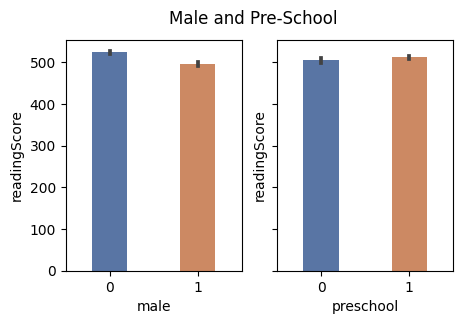

In [ ]:
#print("Male and Reading Score")
print(train[["male", "readingScore"]].groupby(['male'], as_index=True).mean().round(2).sort_values(by='readingScore', ascending=False))
print("\n")
#print("Preschool and Reading Score")
print(train[["preschool", "readingScore"]].groupby(['preschool'], as_index=True).mean().round(2).sort_values(by='readingScore', ascending=False))
print('\n)')
print(train['preschool'].unique())
fig, axes = plt.subplots(1, 2, figsize=(5, 3), sharey=True)
fig.suptitle('Male and Pre-School')

# male
sns.barplot(ax=axes[0], x="male", y="readingScore", data=train, palette="deep", width=0.4)
#axes[0].set_title('Male vs Reading Score', width=0.4)

# Preschool
sns.barplot(ax=axes[1], x="preschool", y="readingScore", data=train,palette="deep", width=0.4)
#axes[1].set_title('Preschool vs Reading Score')



   motherWork  readingScore
1         1.0        499.73
0         0.0        492.71


   fatherWork  readingScore
1         1.0        499.89
0         0.0        485.49

)
   selfBornUS  readingScore
1         1.0        498.41
0         0.0        490.99


   motherBornUS  readingScore
1           1.0        500.74
0           0.0        488.04


   fatherBornUS  readingScore
1           1.0        501.72
0           0.0        484.87

)
   schoolHasLibrary  readingScore
1               1.0        498.44
0               0.0        481.56


   urban  readingScore
0      0        502.76
1      1        490.16

)


<Axes: xlabel='urban', ylabel='readingScore'>

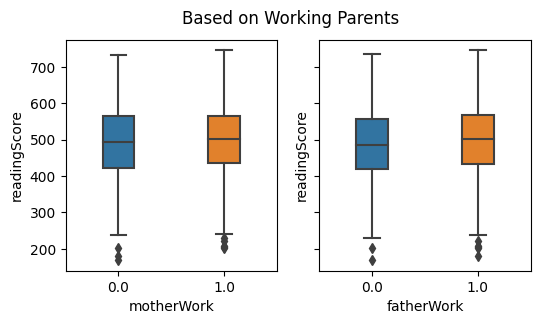

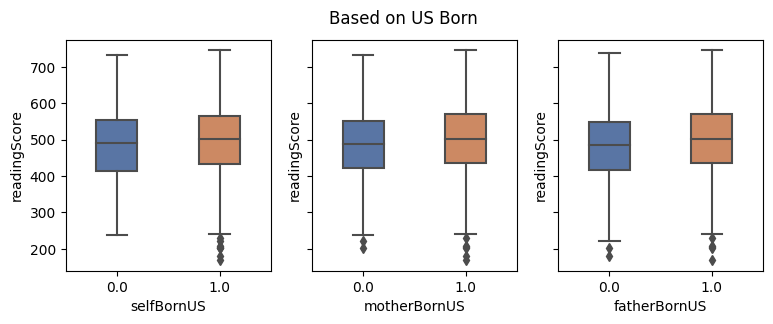

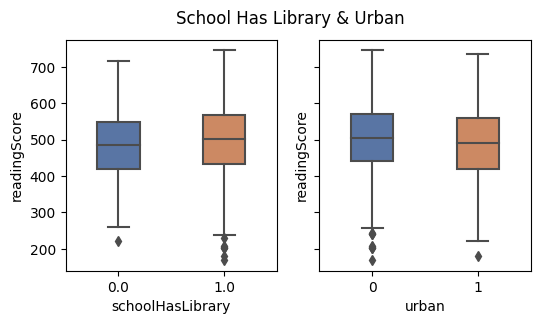

In [ ]:
#print("motherWork and Reading Score")
print(train[["motherWork", "readingScore"]].groupby(['motherWork'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print("\n")
#print("fatherWork and Reading Score")
print(train[["fatherWork", "readingScore"]].groupby(['fatherWork'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print('\n)')

#print("selfBornUS and Reading Score")
print(train[["selfBornUS", "readingScore"]].groupby(['selfBornUS'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print("\n")
#print("motherBornUS and Reading Score")
print(train[["motherBornUS", "readingScore"]].groupby(['motherBornUS'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print("\n")
#print("fatherBornUS and Reading Score")
print(train[["fatherBornUS", "readingScore"]].groupby(['fatherBornUS'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print('\n)')

#print("schoolHasLibrary and Reading Score")
print(train[["schoolHasLibrary", "readingScore"]].groupby(['schoolHasLibrary'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print("\n")
#print("urban and Reading Score")
print(train[["urban", "readingScore"]].groupby(['urban'], as_index=False).mean().round(2).sort_values(by='readingScore', ascending=False))
print('\n)')


fig, axes = plt.subplots(1, 2, figsize=(6,3), sharey=True)
fig.suptitle('Based on Working Parents')

# motherWork
sns.boxplot(ax=axes[0], x="motherWork", y="readingScore",  data=train, width=0.3)
#axes[0].set_title('motherWork vs Reading Score')

# fatherWork
sns.boxplot(ax=axes[1], x="fatherWork", y="readingScore", data=train, width=0.3)
#axes[1].set_title('fatherWork vs Reading Score'

fig, axes = plt.subplots(1, 3, figsize=(9,3), sharey=True)
fig.suptitle('Based on US Born')
# selfBornUS
sns.boxplot(ax=axes[0], x="selfBornUS", y="readingScore", palette = "deep", data=train, width=0.4)
#axes[0].set_title('selfBornUS vs Reading Score')

# motherBornUS
sns.boxplot(ax=axes[1], x="motherBornUS", y="readingScore", palette = "deep", data=train, width=0.4)
#axes[1].set_title('motherBornUS vs Reading Score')

# fatherBornUS
sns.boxplot(ax=axes[2], x="fatherBornUS", y="readingScore", palette = "deep", data=train, width=0.4)
#axes[2].set_title('fatherBornUS vs Reading Score')


fig, axes = plt.subplots(1, 2, figsize=(6,3), sharey=True)
fig.suptitle('School Has Library & Urban')
# SchoolHasLibrary
sns.boxplot(ax=axes[0], x="schoolHasLibrary", y="readingScore", palette = "deep", data=train, width=0.4)
#axes[0].set_title('SchoolHasLibrary vs Reading Score')

# urban
sns.boxplot(ax=axes[1], x="urban", y="readingScore", palette = "deep", data=train, width=0.4)
#axes[2].set_title('urban vs Reading Score')


#### Reading score based on grade and race

In [ ]:
 #Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'raceeth'. 
train['raceeth']= label_encoder.fit_transform(train['raceeth']) 
test['raceeth']= label_encoder.fit_transform(test['raceeth']) 
train['raceeth'] = train['raceeth'].fillna( train['raceeth'].median())
test['raceeth'] = test['raceeth'].fillna(train['raceeth'].median())
#print(train.head())
#print(test.head())


In [ ]:
#from sklearn.preprocessing import OneHotEncoder

# set up the data
#X = [[100, "Cash", "CC"], [101, "Cheque", "CC"], [103, "Cash", "DF"], [104, "Digital", "DF"]]

# set up the OneHotEncoder with sparse=False
#enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# fit the OneHotEncoder
#enc.fit(train['raceeth'])

# define your column names
#colnames = enc.get_feature_names_out('raceeth')

# make your transformed dataframe
#X_new =  pd.DataFrame(enc.fit_transform(train), columns = colnames)

In [ ]:
data_train = train.copy()  
data_train = pd.get_dummies(data_train,
                     columns = ['grade', 'raceeth'])
data_test =test.copy()
data_test = pd.get_dummies(data_test,
                     columns = ['grade', 'raceeth'])                     

#display(data_train)
#display(data_test)


In [ ]:
train['raceeth'] = train['raceeth'].fillna( train['raceeth'].median())
test['raceeth'] = test['raceeth'].fillna(train['raceeth'].median())

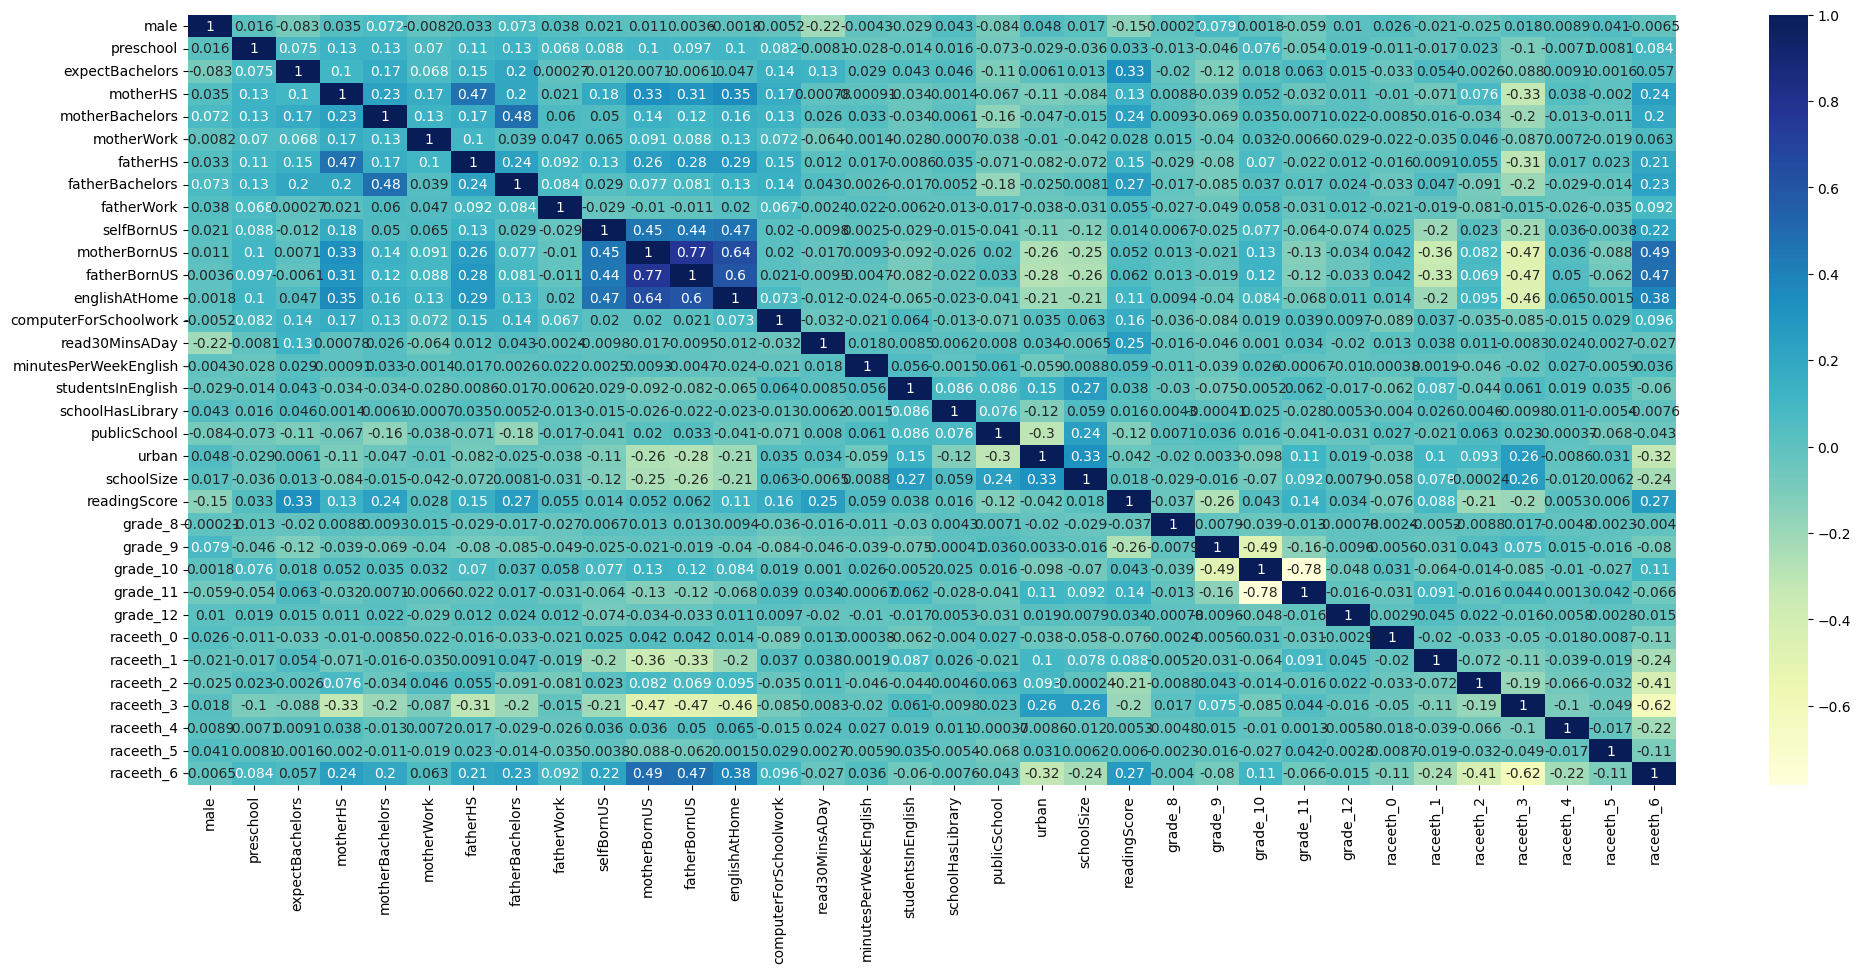

In [ ]:
#Visualizing the data using heatmap
plt.subplots(figsize=(24,10))
sns.heatmap(data_train.corr(), cmap="YlGnBu", annot = True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     122.8
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          2.14e-251
Time:                        02:51:00   Log-Likelihood:                -18000.
No. Observations:                3140   AIC:                         3.603e+04
Df Residuals:                    3127   BIC:                         3.610e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   322.01

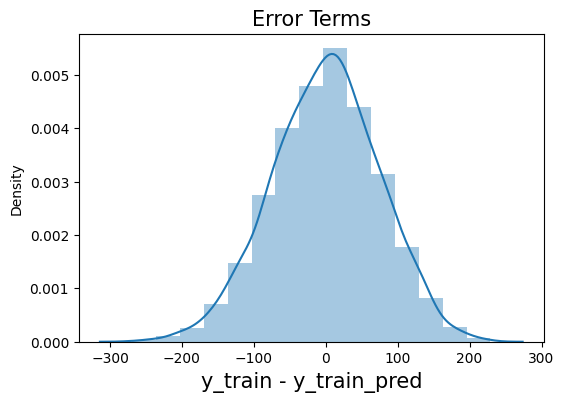



*******************************************************************************
0    467.062153
4    544.091918
6    441.807989
7    508.798431
8    552.570787
dtype: float64


**************************************
R-Squared Value :  0.25503669460469336
**************************************
Regression Plots
eval_env: 1


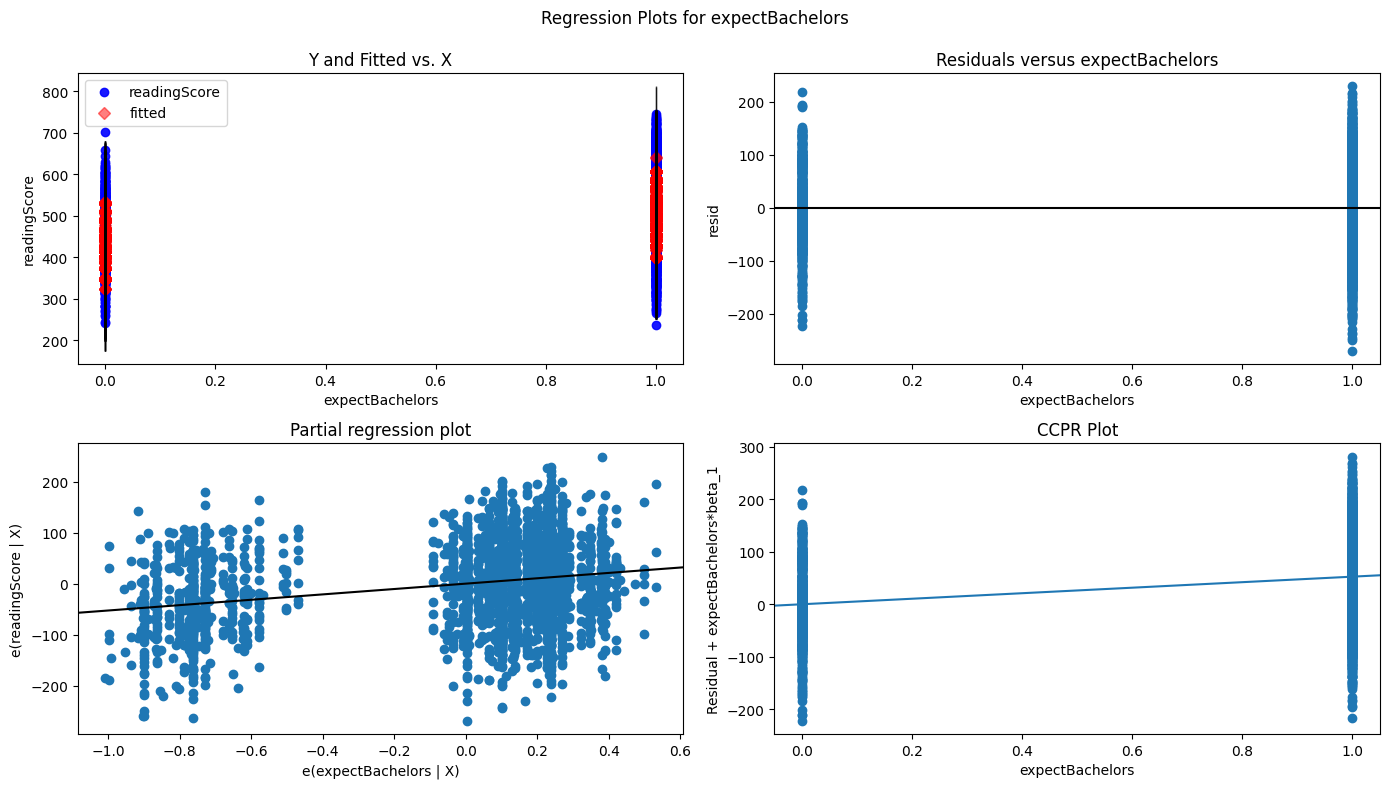

In [ ]:
# Assigning variables for X and y
lst4=['expectBachelors', 'motherBachelors', 'fatherBachelors', 'selfBornUS', 'motherBornUS','fatherBornUS', 
      'grade_9', 'grade_9', 'grade_10','grade_11', 'grade_12', 'raceeth_1',  'raceeth_2', 'raceeth_3', 'raceeth_4', 'raceeth_5', 'raceeth_6' ]
X_train = data_train[lst4]
y_train = data_train['readingScore']

X_test = data_test[lst4]
y_test = data_test['readingScore']
#'minutesPerWeekEnglish','StudentsInEnglish  # 'publicSchool' #'grade_8', #'grade_9', 'motherHS','fatherHS',
# motherBachelors', 'motherBachelors','raceeth_0', 'raceeth_2', 'englishAtHome',

# Assigning variables for X and y
X_train = data_train[['expectBachelors', 'fatherBachelors','computerForSchoolwork', 'read30MinsADay', 'grade_10',
       'grade_11', 'grade_12', 'raceeth_1',  'raceeth_3', 'raceeth_4', 'raceeth_5', 'raceeth_6']]  
                                                                                                         
y_train = data_train['readingScore']                                                                     
X_test = data_test[['expectBachelors',   
       'fatherBachelors', 'computerForSchoolwork','read30MinsADay',  'grade_10',
       'grade_11', 'grade_12', 'raceeth_1', 
       'raceeth_3', 'raceeth_4', 'raceeth_5', 'raceeth_6']] 
y_test = data_test['readingScore']


#Building and training the model
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())
print("\n")

print("*******************************************************************************") 


# Visualizing the regression line
#plt.scatter(X_train, y_train)
#plt.plot(X_train, 425.1761 + (69.4164*X_train['expectBachelors'] + 7.4543*X_train['motherHS'] + 
#        14.7599 *X_train['motherBachelors'] + 14.5665 *X_train['fatherHS'] + 28.9708*X_train['fatherBachelors']) , 'r')
#plt.show()



# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure(figsize=(6,4))
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()
print("\n")

print("*******************************************************************************") 

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
print(y_test_pred.head(5))
print("\n")

print("**************************************")

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
print("R-Squared Value : ", r_squared)

print("**************************************") 

fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
print("Regression Plots")
fig = sm.graphics.plot_regress_exog(lr, 'expectBachelors', fig=fig)

# Questions:






  

*  if the the points plotted are randomly spread or scattered?
*  are the points or residuals scattered around the ‘0’ line?
*   are the points based on one side so there’s a problem of heteroscedasticity?
*  With the predictor variable expectedBachelors, is there a heteroscedasticity.   
  

1.  heteroscedasticity does not cause bias in the coefficient estimates, it does make them less precise.
2.  Lower precision(coefficient estimates) increases the likelihood that the coefficient estimates are further from the correct population value. 
3. Heteroscedasticity tends to produce p-values that are smaller than they should be.
4. with the predictor variable 'expectedBachelors' is there a heteroscedasticity?






# Regression model 2

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     122.8
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          2.14e-251
Time:                        02:55:09   Log-Likelihood:                -18000.
No. Observations:                3140   AIC:                         3.603e+04
Df Residuals:                    3127   BIC:                         3.610e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   322.01

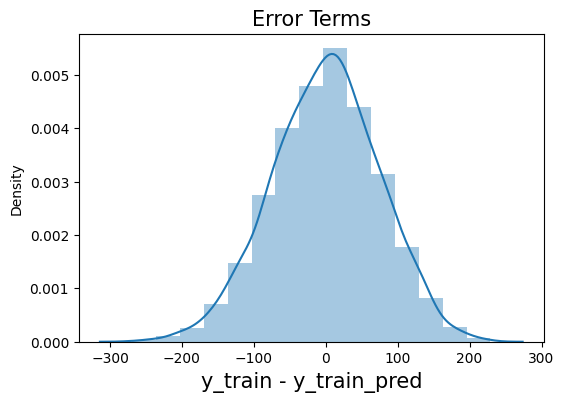



*******************************************************************************
0    467.062153
4    544.091918
6    441.807989
7    508.798431
8    552.570787
dtype: float64


**************************************
R-Squared Value :  0.25503669460469336
**************************************
Regression Plots
eval_env: 1


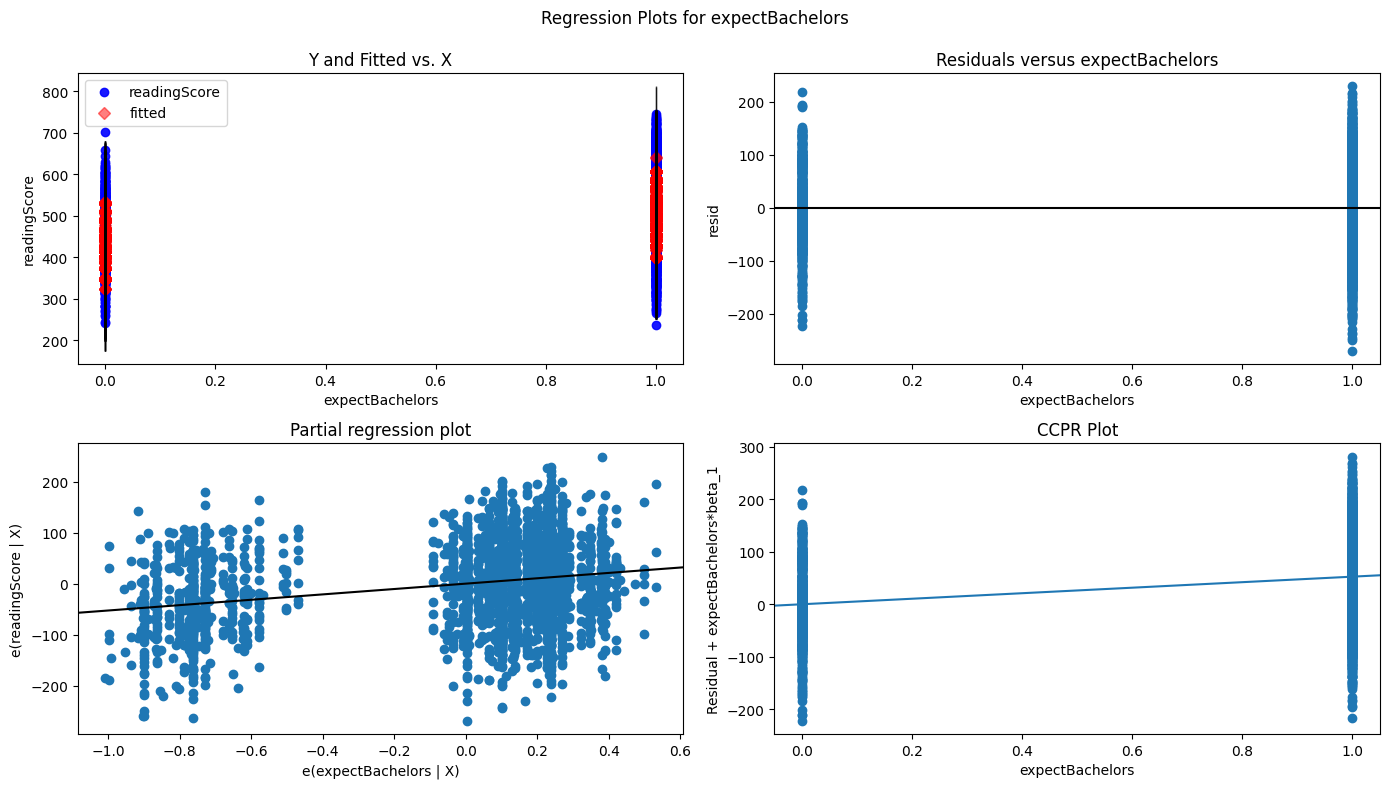

In [ ]:
# Assigning variables for X and y
# Assigning variables for X and y
lst5=['expectBachelors', 'motherBachelors', 'fatherBachelors', 'selfBornUS', 'motherBornUS','fatherBornUS', 
       'raceeth_1',  'raceeth_2', 'raceeth_3', 'raceeth_4', 'raceeth_5', 'raceeth_6' ]
X_train = data_train[lst5]
y_train = data_train['readingScore']

X_test = data_test[lst5]
y_test = data_test['readingScore']

#Building and training the model
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())
print("\n")

print("*******************************************************************************") 


# Visualizing the regression line
#plt.scatter(X_train, y_train)
#plt.plot(X_train, 425.1761 + (69.4164*X_train['expectBachelors'] + 7.4543*X_train['motherHS'] + 
#        14.7599 *X_train['motherBachelors'] + 14.5665 *X_train['fatherHS'] + 28.9708*X_train['fatherBachelors']) , 'r')
#plt.show()



# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure(figsize=(6,4))
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()
print("\n")

print("*******************************************************************************") 

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
print(y_test_pred.head(5))
print("\n")

print("**************************************")

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
print("R-Squared Value : ", r_squared)

print("**************************************") 

fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
print("Regression Plots")
fig = sm.graphics.plot_regress_exog(lr, 'expectBachelors', fig=fig)

# Regression Model 3

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     87.08
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          8.40e-159
Time:                        03:03:11   Log-Likelihood:                -18220.
No. Observations:                3140   AIC:                         3.646e+04
Df Residuals:                    3129   BIC:                         3.653e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             328.3501     57.113     

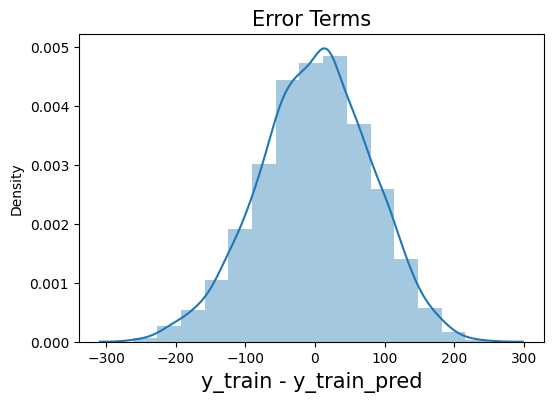



*******************************************************************************
0    469.945783
4    536.610829
6    449.032430
7    449.032430
8    518.384133
dtype: float64


**************************************
R-Squared Value :  0.1837238677111448


In [ ]:
# Assigning variables for X and y
lst6=['expectBachelors', 'motherBachelors', 'fatherBachelors', 'selfBornUS', 'motherBornUS','fatherBornUS', 
       'grade_9', 'grade_10','grade_11', 'grade_12' ]
X_train = data_train[lst6]
y_train = data_train['readingScore']

X_test = data_test[lst6]
y_test = data_test['readingScore']
#'minutesPerWeekEnglish','StudentsInEnglish  # 'publicSchool' #'grade_8', #'grade_9', 'motherHS','fatherHS',
# motherBachelors', 'motherBachelors','raceeth_0', 'raceeth_2', 'englishAtHome',

#Building and training the model
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())
print("\n")

print("*******************************************************************************") 


# Visualizing the regression line
#plt.scatter(X_train, y_train)
#plt.plot(X_train, 425.1761 + (69.4164*X_train['expectBachelors'] + 7.4543*X_train['motherHS'] + 
#        14.7599 *X_train['motherBachelors'] + 14.5665 *X_train['fatherHS'] + 28.9708*X_train['fatherBachelors']) , 'r')
#plt.show()



# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure(figsize=(6,4))
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()
print("\n")

print("*******************************************************************************") 

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
print(y_test_pred.head(5))
print("\n")

print("**************************************")

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
print("R-Squared Value : ", r_squared)


# Regression Model 4

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     123.7
Date:                Fri, 07 Apr 2023   Prob (F-statistic):          3.89e-253
Time:                        03:36:55   Log-Likelihood:                -17996.
No. Observations:                3140   AIC:                         3.602e+04
Df Residuals:                    3127   BIC:                         3.610e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             337.2217      6.178     

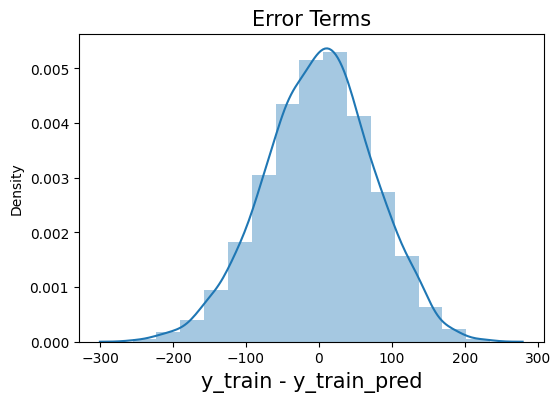



*******************************************************************************
0    479.042336
4    531.226700
6    434.075014
7    501.713631
8    557.357647
dtype: float64


**************************************
R-Squared Value :  0.2523469309687083


In [ ]:
# Assigning variables for X and y
lst7=['expectBachelors','fatherBachelors', 'motherBachelors', 'read30MinsADay',
       'raceeth_1',   'raceeth_3', 'raceeth_4', 'raceeth_5', 'raceeth_6',  'grade_10','grade_11', 'grade_12' ]
X_train = data_train[lst7]
y_train = data_train['readingScore']

X_test = data_test[lst7]
y_test = data_test['readingScore']
#'minutesPerWeekEnglish','StudentsInEnglish  # 'publicSchool' #'grade_8', #'grade_9', 'motherHS','fatherHS',
# motherBachelors', 'motherBachelors','raceeth_0', 'raceeth_2', 'englishAtHome',

#Building and training the model
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())
print("\n")

print("*******************************************************************************") 


# Visualizing the regression line
#plt.scatter(X_train, y_train)
#337.2217+ 52.8429*X_train['expectBachelors']+17.6627*X_train['fatherBachelors']+18.3212* X_train['motherBachelors']+
#40.9925*X_train['read30MinsADay']+72.7073* X_train['raceeth_1']+29.0281*X_train['raceeth_2']+
# 53.0685* X_train['raceeth_3']+52.5442*X_train['raceeth_4']+52.5442*X_train['raceeth_5']+67.6386*X_train['raceeth_6'] +
# 55.8608*X_train['grade_10']+75.5210*X_train['grade_11']+ 149.2875*X_train['grade_12']
#plt.plot(X_train, 425.1761 + (69.4164*X_train['expectBachelors'] + 7.4543*X_train['motherHS'] + 
#        14.7599 *X_train['motherBachelors'] + 14.5665 *X_train['fatherHS'] + 28.9708*X_train['fatherBachelors']) , 'r')
#plt.show()



# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure(figsize=(6,4))
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()
print("\n")

print("*******************************************************************************") 

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
print(y_test_pred.head(5))
print("\n")

print("**************************************")

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
print("R-Squared Value : ", r_squared)


